# AlexNet Implementation

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import cv2
import tensorflow as tf

In [2]:
X_train = np.load("lib/datasets/X_train.npy")
X_test = np.load("lib/datasets/X_test.npy" )
X_val = np.load("lib/datasets/X_val.npy")
y_train_e = np.load("lib/datasets/y_train_e.npy")
y_test_e = np.load("lib/datasets/y_test_e.npy")
y_val_e = np.load("lib/datasets/y_val_e.npy" )

### AlexNet

In [9]:
def scheduler(epoch, lr):
    #if epoch == 12 or epoch == 20 or epoch == 25:
    if epoch == 12 or epoch == 20 or epoch == 29:
        return lr / 10
    else:
        return lr

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, ZeroPadding2D, BatchNormalization

In [4]:
model=Sequential()

model.add(Conv2D(96,(11,11),strides=4,activation='relu',input_shape=X_train.shape[1:],padding='valid'))
model.add(MaxPool2D((3,3),strides=2))
model.add(BatchNormalization())

model.add(ZeroPadding2D(padding=2))
model.add(Conv2D(256,(5,5),activation='relu',padding='same'))
model.add(MaxPool2D((3,3), strides=2))
model.add(BatchNormalization())

model.add(ZeroPadding2D(padding=1))
model.add(Conv2D(384,(3,3),activation='relu',padding='same'))

model.add(ZeroPadding2D(padding=1))
model.add(Conv2D(384,(3,3),activation='relu',padding='same'))

model.add(ZeroPadding2D(padding=1))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))

model.add(Flatten())
model.add(Dense(4096,activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(4096,activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(48,activation="softmax"))

model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.optimizers.SGD(learning_rate=0.001),
              metrics=['accuracy'])
#callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.1, patience=5, verbose=1,
    mode='max', min_delta=0.0001, cooldown=2, min_lr=0)
epochs = 50
history = model.fit(X_train, y_train_e, batch_size=32, epochs=epochs,
validation_data=(X_val, y_val_e), callbacks = [callback])

Epoch 1/50
129/129 [==============================] - 27s 168ms/step - loss: 2.9883 - accuracy: 0.2295 - val_loss: 2.6629 - val_accuracy: 0.2801 - lr: 0.0010
Epoch 2/50
129/129 [==============================] - 12s 90ms/step - loss: 2.7005 - accuracy: 0.2638 - val_loss: 2.4826 - val_accuracy: 0.3115 - lr: 0.0010
Epoch 3/50
129/129 [==============================] - 12s 90ms/step - loss: 2.5284 - accuracy: 0.3093 - val_loss: 2.2739 - val_accuracy: 0.3982 - lr: 0.0010
Epoch 4/50
129/129 [==============================] - 11s 89ms/step - loss: 2.3757 - accuracy: 0.3506 - val_loss: 2.1117 - val_accuracy: 0.4427 - lr: 0.0010
Epoch 5/50
129/129 [==============================] - 12s 91ms/step - loss: 2.2157 - accuracy: 0.3888 - val_loss: 1.9860 - val_accuracy: 0.4384 - lr: 0.0010
Epoch 6/50
129/129 [==============================] - 12s 91ms/step - loss: 2.0364 - accuracy: 0.4372 - val_loss: 1.8215 - val_accuracy: 0.4843 - lr: 0.0010
Epoch 7/50
129/129 [==============================] - 11s

In [11]:
model.save("App/lib/models/AlexNet_test")

INFO:tensorflow:Assets written to: App/lib/models/AlexNet_test\assets


In [7]:
y_pred = np.argmax(model.predict(X_test),axis=1)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test_e, y_pred))

Accuracy: 0.8760029175784099


In [5]:
import matplotlib.pyplot as plt
def plot(history):
    val = [max(history.history['val_accuracy']),np.argmax(history.history['val_accuracy'])]
    train = [max(history.history['accuracy']),np.argmax(history.history['accuracy'])]

    x_ax = list(np.linspace(0, len(history.history['accuracy']), num=9))
    x_ax.append(val[1])
    y_ax = list(np.linspace(0, 1, num=6))
    y_ax.append(val[0])


    plt.figure(0)

    plt.plot(history.history['accuracy'], label='training accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')

    plt.plot(train[1], train[0], 'bo')
    plt.plot([train[1],train[1]],[0, train[0]],':b')
    plt.plot([0,train[1]],[train[0], train[0]],':b')

    plt.plot(val[1],val[0], 'ro')
    plt.plot([val[1],val[1]],[0, val[0]],':r')
    plt.plot([0,val[1]],[val[0], val[0]],':r')

    plt.gcf().set_size_inches(14,7)
    plt.title('Accuracy')
    plt.xlabel('epochs')
    plt.xticks(x_ax)
    plt.ylabel('accuracy')
    plt.yticks(y_ax)
    plt.legend()

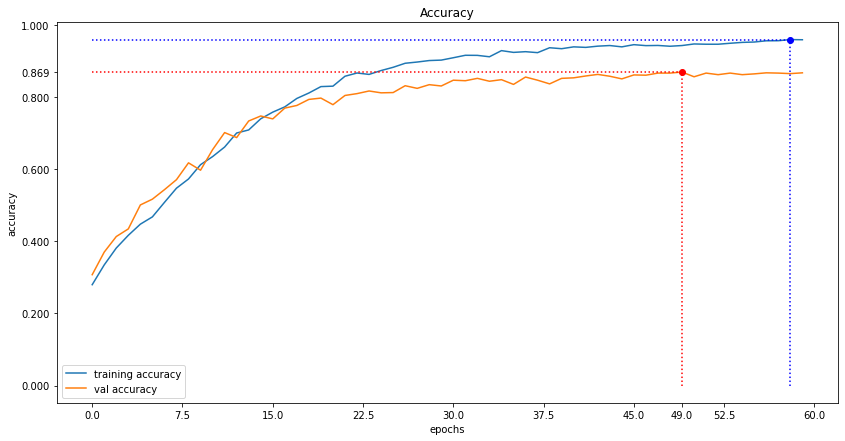

In [6]:
# 224 224 d0.5
plot(history)

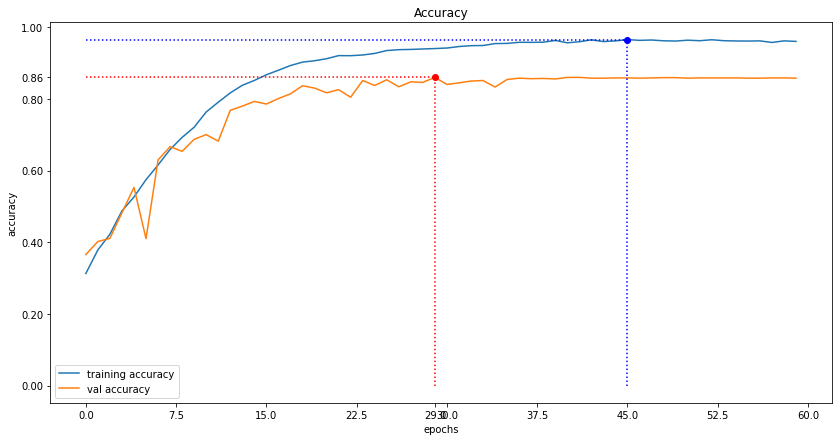

In [7]:
#224 224 d0.3
plot(history)